# UBC 2018W2 DSCI 100 PROJECT - GROUP 14

## Introduction
Hello and welcome to our term project! We are Group 14 in the 2018W2 section of the DSCI 100 course at UBC. Our group is comprised of 3 undergraduate students, all of whom major in either Computer Science or Statistics (or both). The primary topic of our project is the determination of an optimal first diagnosis for Chronic Kidney Disease. If you have any question about our project or if there is an issue with the project you would like to raise, please feel free to open an Issue on our github repository, or to contact us directly (contact information can be found on github).

## Background and Motivation
Chronic kidney disease (CKD) affects hundreds of millions worldwide. Patients generally experience a gradual loss of kidney function, which may introduce further complications like heart diseases or edemas. Currently, diagnosis involves blood, urine, imaging, and kidney tissue tests (CKD Diagnosis, n.d.). Around the globe, CKD’s prevalence is estimated at 11% to 14% (Hill et al. 2016). 

Given its pervasiveness, there is immense value in an efficient first diagnosis for CKD that optimizes between accuracy and time. This is because it is unlikely to be immediately concluded that a person has CKD just from the results of a first medical test. For a conclusive result, more tests are usually required. Consider the Complete Blood Count, a medical test that yields information about a patient's white and red blood cells. For the sake of the argument, we assume the global prevalence of CKD to be 12.5%. We further assume that the results of a Complete Blood Count test is able to correctly identify 95% of CKD patients, and only incorrectly identifies 5% of non-patients. Then, Bayes' Theorem gives us the probability that a patient actually has CKD given that a patient has tested positive:

$$P(\textrm{CKD}|\textrm{positive}) = \frac{P(\textrm{positive}|\textrm{CKD})P(\textrm{CKD})}{P(\textrm{positive}|\textrm{CKD})P(\textrm{CKD})+P(\textrm{positive}|\textrm{No_CKD})P(\textrm{No_CKD})}$$

$$ = \frac{0.95*0.125}{0.95*0.125+0.05*0.875}$$

$$ = 0.73 $$

This means that even with a medical test that is 95% accurate, testing positive only means that a patient has a 73% chance of actually having CKD. Even if we had assumed that the medical test was 99% accurate, the corresponding probability of actually having CKD would only jump to 93%, which, while alarming, is hardly an incontrovertible figure. Clearly, a second or even third diagnosis would be needed regardless in order to obtain a conclusive result. Then, given that the accuracy of a first diagnosis is not absolutely vital (since further diagnosis would be most likely be needed anyway), and that medical tests are often costly and time-consuming, we see an opportunity for a kind of optimality analysis that investigates the possibility of reducing on testing - to save time and effort - while retaining the integrity and serviceability of a first diagnosis - which serves to "raise an alarm" for further testing.

Specifically, then, our question is: **what is the optimal number of medical tests in a first diagnosis of CKD, and what are those tests?** The wording in the question has been left purposely vague so as to allow for some flexibility in our conclusions (as we are not sure what we will find). For example, we might find that 1 medical test is able to diagnosis CKD with a reasonable level of accuracy, but 2 medical tests combined are significantly more accurate, in which case we may conclude that the 2 medical test method is optimal, as the extra time and effort spent on the additional medical test is well justified by the large increase in accuracy.

## Data

We will be using the UCI Machine Learning Repository CKD dataset (Dua, D. and Graff, C., 2019). This rectangular data set was compiled in Apollo Hospitals in India, it contains data on 400 individuals. For each individual, data on the results of various diagnosis tests (e.g. blood pressure) are available including the final CKD diagnosis. We note that the dataset will need to be cleaned up before analysis can be done, as there are many missing values.

Inspired by Marianela Ramos Capelo, a Keynote Speaker in the Women in Data Science Conference (2019) at UBC, we acknowledge that this dataset contains anonymous medical information on individuals who may or may not have consented to the compilation of their information into a dataset freely available on the internet. However, we forsee no risk of privacy loss arising from our use of this dataset, as each individual has, in our view, been absolutely de-identified. To support our view, we note that the most identifying pieces of information in the dataset are: the age of each individual, and the fact that the individuals in the data are presumably Indian as the dataset has been compiled in an Indian hospital.

## Method

We will first group all of the predictor variables in the dataset into medical tests. For example, all of the variables regarding red and white blood cells will be grouped together, since they can all be obtained from a Complete Blood Count test. Variables that do not belong to any medical test will remain as standalone predictors. Then, for each medical test and each combination of medical tests, we will 
1. split the available data into a training and testing set, 
2. train a knn classification model with Cross Validation to determine the best k-value,
3. train a final model with the best k-value found, and
4. assess final model by calculating training and testing accuracies.

We will repeat the above process for every medical test and standalone predictor and every combination thereof, the resulting accuracies of which will inform our concluding answer to the original question we posed.

## Content
#### A: Test-trial of our method on two medical tests (EDA)
#### B: Automation to perform method on every combination of tests
#### C: Making improvements to our models
#### D: Conclusions
#### E: Citations

## A1. Load necessary packages

In [1]:
install.packages("e1071")
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



## A2. Load dataset (Chronic Kidney Disease)

In [2]:
ckd <- read_csv("data/chronic_kidney_disease_full.csv")
head(ckd)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


## A3. Change all binary categorical variables to numerical, scale data
The following code cell changes all of the binary categorical variables to numerical (e.g. yes/no to 1/0) so as to allow us to include them in our models later on. We also scale the data here as it is important for knn classification.

In [3]:
#This block changes categorical vars (e.g. yes/no) to numerical (i.e. 1/0)
ckd <- ckd %>%
    mutate(rbc = ifelse(rbc == "abnormal", 1, 0)) %>%
    mutate(pc = ifelse(pc == "abnormal", 1, 0)) %>%
    mutate(pcc = ifelse(pcc == "present", 1, 0)) %>%
    mutate(ba = ifelse(ba == "present", 1, 0))

temp_ckd <- ckd %>%
    select(-c(htn,dm,cad,appet,pe,ane,class)) %>%
    scale(center = FALSE)

ckd <- data.frame(temp_ckd, class = ckd$class)

head(ckd)

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0.8834323,1.0285299,1.0011109,0.590605,0.000000,NA,0.000000,0.000000,0,0.7197520,0.4703996,0.1842338,NA,NA,1.1958231,1.1011476,0.8734525,1.0774127,ckd
0.1288339,0.6428312,1.0011109,2.362420,0.000000,NA,0.000000,0.000000,0,NA,0.2351998,0.1228225,NA,NA,0.8774546,0.9509911,0.6718865,NA,ckd
1.1411000,1.0285299,0.9912961,1.181210,2.525177,0,0.000000,0.000000,0,2.5161580,0.6925327,0.2763506,NA,NA,0.7454482,0.7758086,0.8398581,NA,ckd
0.8834323,0.8999637,0.9863887,2.362420,0.000000,0,2.096363,3.066718,0,0.6959586,0.7317327,0.5834069,0.8035229,0.4441594,0.8696895,0.8008346,0.7502733,0.8080595,ckd
0.9386468,1.0285299,0.9912961,1.181210,0.000000,0,0.000000,0.000000,0,0.6305266,0.3397330,0.2149394,NA,NA,0.9007499,0.8759129,0.8174619,0.9530958,ckd
1.1042903,1.1570962,0.9962035,1.771815,0.000000,NA,NA,0.000000,0,0.4401789,0.3266664,0.1688809,1.0279302,0.5685240,0.9473404,0.9760172,0.8734525,0.9116569,ckd


## A4. Visualize CKD correlation with different predictors
As a sanity check, here we use geom_density to visualize correlation between various predictors and CKD. In the results, we see a mix of predictors that seem to be somewhat correlated with CKD (where we see two distinct regions in the density plot - one for CKD and the other for no CKD), and predictors that don't seem to be correlated with CKD (where the CKD and no_CKD regions have siginicant overlap, indicating that the variable in question may not do a good job of differentiating CKD patients from non-patients).

Warning message:
“Removed 9 rows containing non-finite values (stat_density).”

Warning message:
“Removed 12 rows containing non-finite values (stat_density).”

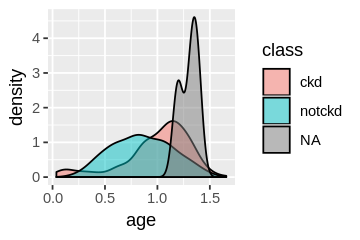

Warning message:
“Removed 47 rows containing non-finite values (stat_density).”

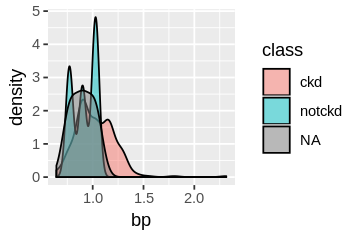

Warning message:
“Removed 46 rows containing non-finite values (stat_density).”

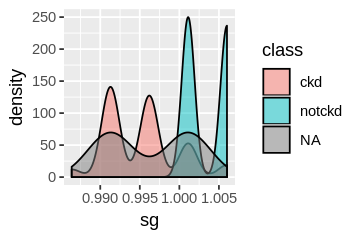

Warning message:
“Removed 49 rows containing non-finite values (stat_density).”

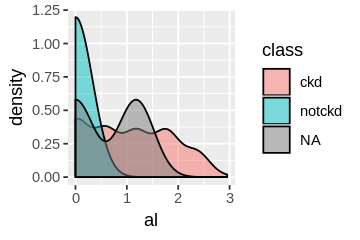

Warning message:
“Removed 152 rows containing non-finite values (stat_density).”

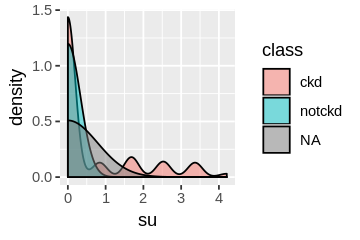

Warning message:
“Removed 65 rows containing non-finite values (stat_density).”

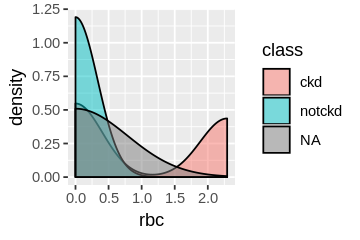

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”

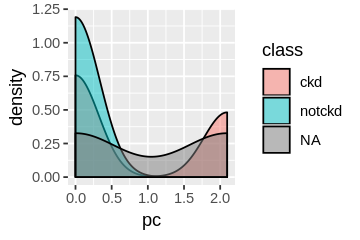

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”

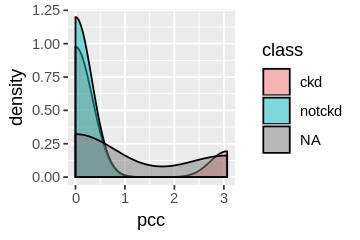

Warning message:
“Removed 44 rows containing non-finite values (stat_density).”

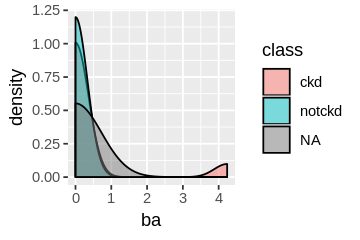

Warning message:
“Removed 19 rows containing non-finite values (stat_density).”

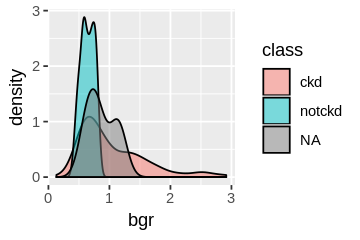

Warning message:
“Removed 17 rows containing non-finite values (stat_density).”

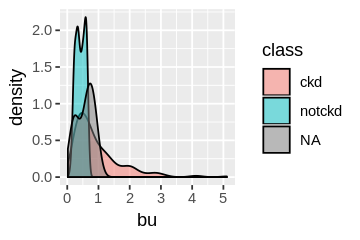

Warning message:
“Removed 87 rows containing non-finite values (stat_density).”

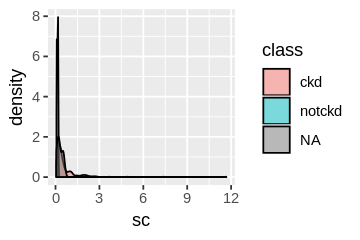

Warning message:
“Removed 88 rows containing non-finite values (stat_density).”

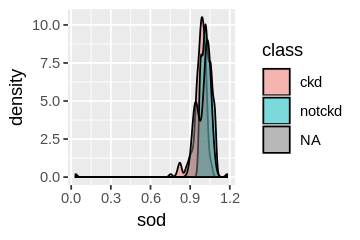

Warning message:
“Removed 52 rows containing non-finite values (stat_density).”

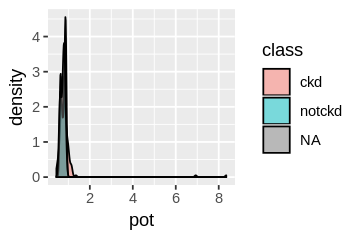

Warning message:
“Removed 72 rows containing non-finite values (stat_density).”

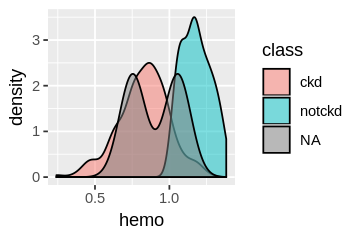

Warning message:
“Removed 108 rows containing non-finite values (stat_density).”

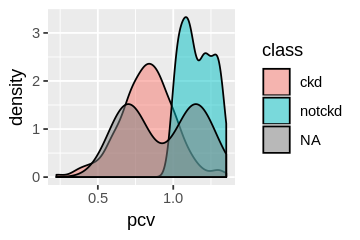

Warning message:
“Removed 131 rows containing non-finite values (stat_density).”

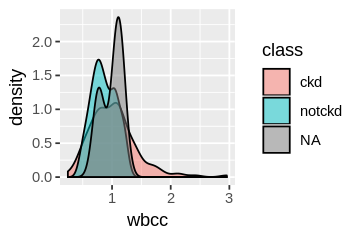

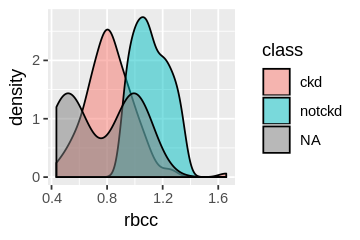

In [4]:
options(repr.plot.width = 3, repr.plot.height = 2) 

age_plot <- ckd %>%
    ggplot(aes(x = age, fill = class)) +
    geom_density(alpha=0.5)

bp_plot <- ckd %>%
    ggplot(aes(x = bp, fill = class)) +
    geom_density(alpha=0.5)

sg_plot <- ckd %>%
    ggplot(aes(x = sg, fill = class)) +
    geom_density(alpha=0.5)

al_plot <- ckd %>%
    ggplot(aes(x = al, fill = class)) +
    geom_density(alpha=0.5)

su_plot <- ckd %>%
    ggplot(aes(x = su, fill = class)) +
    geom_density(alpha=0.5)

rbc_plot <- ckd %>%
    ggplot(aes(x = rbc, fill = class)) +
    geom_density(alpha=0.5)

pc_plot <- ckd %>%
    ggplot(aes(x = pc, fill = class)) +
    geom_density(alpha=0.5)

pcc_plot <- ckd %>%
    ggplot(aes(x = pcc, fill = class)) +
    geom_density(alpha=0.5)

ba_plot <- ckd %>%
    ggplot(aes(x = ba, fill = class)) +
    geom_density(alpha=0.5)

bgr_plot <- ckd %>%
    ggplot(aes(x = bgr, fill = class)) +
    geom_density(alpha=0.5)

bu_plot <- ckd %>%
    ggplot(aes(x = bu, fill = class)) +
    geom_density(alpha=0.5)

sc_plot <- ckd %>%
    ggplot(aes(x = sc, fill = class)) +
    geom_density(alpha=0.5)

sod_plot <- ckd %>%
    ggplot(aes(x = sod, fill = class)) +
    geom_density(alpha=0.5)

pot_plot <- ckd %>%
    ggplot(aes(x = pot, fill = class)) +
    geom_density(alpha=0.5)

hemo_plot <- ckd %>%
    ggplot(aes(x = hemo, fill = class)) +
    geom_density(alpha=0.5)

pcv_plot <- ckd %>%
    ggplot(aes(x = pcv, fill = class)) +
    geom_density(alpha=0.5)

wbcc_plot <- ckd %>%
    ggplot(aes(x = wbcc, fill = class)) +
    geom_density(alpha=0.5)

rbcc_plot <- ckd %>%
    ggplot(aes(x = rbcc, fill = class)) +
    geom_density(alpha=0.5)

age_plot
bp_plot
sg_plot
al_plot
su_plot
rbc_plot
pc_plot
pcc_plot
ba_plot
bgr_plot
bu_plot
sc_plot
sod_plot
pot_plot
hemo_plot
pcv_plot
wbcc_plot
rbcc_plot

## A5. Select appropriate features, slice data into training/testing sets (BMP)

The medical test in question here is the Basic Metabolic Panel. Its associated features are: albumin, blood glucose, blood urea, serum creatinine, sodium, and potassium.

We have used the na.omit() function here to handle missing values. The na.omit() function removes rows in the data that have missing values (i.e. "NA").

The split between training and testing data we have used here is 80/20.

In [5]:
set.seed(1234)

ckd_BMP <- ckd %>%
    select(al,bgr,bu,sc,sod,pot,class) %>%
    na.omit() #removes all rows with any NA in (al,bgr,bu,sc,sod,pot,class)

training_rows_BMP <- ckd_BMP %>%
    select(class) %>%
    unlist() %>%
    createDataPartition(p = 0.8, list = FALSE)    

X_train_BMP <- ckd_BMP %>%
    select(-class) %>%
    slice(training_rows_BMP) %>%
    data.frame()

Y_train_BMP <- ckd_BMP %>%
    select(class) %>%
    slice(training_rows_BMP) %>%
    unlist()

X_test_BMP <- ckd_BMP %>%
    select(-class) %>%
    slice(-training_rows_BMP) %>%
    data.frame()

Y_test_BMP <- ckd_BMP %>%
    select(class) %>%
    slice(-training_rows_BMP) %>%
    unlist()

## A6. Train model with Train Control using many different k-values

In [6]:
set.seed(1234)

train_control <- trainControl(method="cv", number = 5)

k = data.frame(k = c(seq(from = 1,to = 10)))

model_BMP <- train(x = X_train_BMP, y = Y_train_BMP, method = "knn", tuneGrid = k, trControl = train_control)
model_BMP

k-Nearest Neighbors 

208 samples
  6 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 166, 167, 166, 167, 166 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9328688  0.8651707
   2  0.9472706  0.8939887
   3  0.9520325  0.9033787
   4  0.9472706  0.8938552
   5  0.9377468  0.8745897
   6  0.9328688  0.8647925
   7  0.9328688  0.8646612
   8  0.9328688  0.8646612
   9  0.9328688  0.8646612
  10  0.9328688  0.8646612

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

## A7. Display accuracies with different k-values in descending order, plot k vs Accuracy
As can be seen in the output of the following code cell, the best k-value is 3, with an associated accuracy of around 95%.

k,Accuracy,Kappa,AccuracySD,KappaSD
3,0.9520325,0.9033787,0.02904646,0.05891943
2,0.9472706,0.8939887,0.02587432,0.05259944
4,0.9472706,0.8938552,0.03086952,0.06251067
5,0.9377468,0.8745897,0.03164365,0.06406499
1,0.9328688,0.8651707,0.03091919,0.06236926
6,0.9328688,0.8647925,0.01936769,0.03949951
7,0.9328688,0.8646612,0.01936769,0.03953509
8,0.9328688,0.8646612,0.01936769,0.03953509
9,0.9328688,0.8646612,0.01936769,0.03953509
10,0.9328688,0.8646612,0.01936769,0.03953509


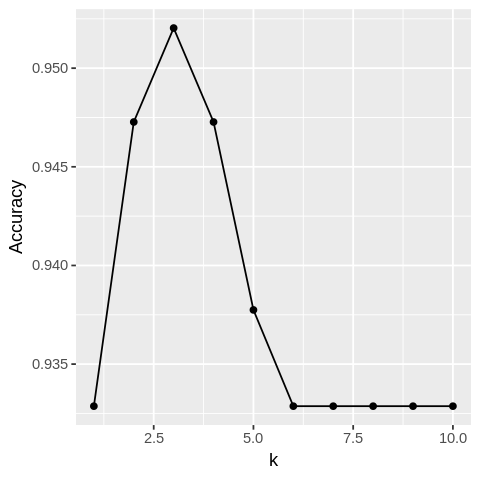

In [7]:
options(repr.plot.width = 4, repr.plot.height = 4) 

result_CV_BMP <- arrange(model_BMP$results, desc(Accuracy))
result_CV_BMP

result_CV_BMP_plot <- result_CV_BMP %>%
    ggplot(aes(x = k,y = Accuracy)) +
    geom_point() + 
    geom_line()

result_CV_BMP_plot

## A8. Train final model with best k-value found in step 6
We note that the Accuracy displayed by the output of the following code cell is lower than the max accuracy displayed above for the same k - this discrepancy is expected as we train our final model here without CV (since we have already found the best k-value from above).

In [8]:
k_final_BMP = data.frame(k = result_CV_BMP$k[1])
model_BMP_final <- train(x = X_train_BMP, y = Y_train_BMP, method = "knn", tuneGrid = k_final_BMP)
model_BMP_final

k-Nearest Neighbors 

208 samples
  6 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  Accuracy   Kappa    
  0.9375042  0.8745718

Tuning parameter 'k' was held constant at a value of 3

## A9. Assess final model
Here we assess the final model by both training accuracy as well as testing accuracy. It can be concluded by the output of the following code cell that the BMP alone is reasonably accurate at predicting CKD, having a training and testing accuracy of around 96% for the final model trained with the best k-value found.

In [9]:
train_pred_BMP <- predict(model_BMP_final, X_train_BMP)
model_quality_train_BMP <- confusionMatrix(data = train_pred_BMP, reference = Y_train_BMP)

test_pred_BMP <- predict(model_BMP_final, X_test_BMP)
model_quality_test_BMP <- confusionMatrix(data = test_pred_BMP, reference = Y_test_BMP)

result_BMP <- data.frame(Medical_test = "Basic Metabolic Panel",
                         Max_CV_Accuracy = result_CV_BMP$Accuracy[1],
                         Best_k = result_CV_BMP$k[1],
                         Final_Model_Training_Accuracy = model_quality_train_BMP$overall[[1]],
                         Final_Model_Testing_Accuracy = model_quality_test_BMP$overall[[1]],
                         Total_sample_size = nrow(ckd_BMP),
                         Training_set_size = nrow(X_train_BMP),
                         Testing_set_size = nrow(X_test_BMP))

result_BMP

Medical_test,Max_CV_Accuracy,Best_k,Final_Model_Training_Accuracy,Final_Model_Testing_Accuracy,Total_sample_size,Training_set_size,Testing_set_size
Basic Metabolic Panel,0.9520325,3,0.9567308,0.9607843,259,208,51


## A10. Repeat test method with another medical test (Complete Blood Count)

In [10]:
set.seed(1234)
# This section prepares the data by selecting the appropriate features
# (in this case those produced by a CBC test), removing NA
# values, and splits the data into testing and training sets.

ckd_CBC <- ckd %>%
    select(c("rbc","hemo","pcv","wbcc","rbcc","class")) %>%
    na.omit()

training_rows_CBC <- ckd_CBC %>%
    select(class) %>%
    unlist() %>%
    createDataPartition(p = 0.8, list = FALSE)    

X_train_CBC <- ckd_CBC %>%
    select(-class) %>%
    slice(training_rows_CBC) %>%
    data.frame()

Y_train_CBC <- ckd_CBC %>%
    select(class) %>%
    slice(training_rows_CBC) %>%
    unlist()

X_test_CBC <- ckd_CBC %>%
    select(-class) %>%
    slice(-training_rows_CBC) %>%
    data.frame()

Y_test_CBC <- ckd_CBC %>%
    select(class) %>%
    slice(-training_rows_CBC) %>%
    unlist()

#------------------------------------------------------------------------------------------------------------

# This section first trains a model with CV to find the best k-value (where
# accuracy is highest). Then it trains a final model with the best k-value found.

train_control <- trainControl(method="cv", number = 5)

k = data.frame(k = c(seq(from = 1,to = 10)))

model_CBC <- train(x = X_train_CBC, y = Y_train_CBC, method = "knn", tuneGrid = k, trControl = train_control)

result_CV_CBC <- arrange(model_CBC$results, desc(Accuracy))

k_final_CBC = data.frame(k = result_CV_CBC$k[1])
model_CBC_final <- train(x = X_train_CBC, y = Y_train_CBC, method = "knn", tuneGrid = k_final_CBC)

#------------------------------------------------------------------------------------------------------------

# This section gets predictions from our final model with both X_train and X_test 
# and calculates the respective accuracies. It also displays the final result as 
# a data frame.

train_pred_CBC <- predict(model_CBC_final, X_train_CBC)
model_quality_train_CBC <- confusionMatrix(data = train_pred_CBC, reference = Y_train_CBC)

test_pred_CBC <- predict(model_CBC_final, X_test_CBC)
model_quality_test_CBC <- confusionMatrix(data = test_pred_CBC, reference = Y_test_CBC)

result_CBC <- data.frame(Medical_test = "Complete Blood Count",
                         Max_CV_Accuracy = result_CV_CBC$Accuracy[1],
                         Best_k = result_CV_CBC$k[1],
                         Final_Model_Training_Accuracy = model_quality_train_CBC$overall[[1]],
                         Final_Model_Testing_Accuracy = model_quality_test_CBC$overall[[1]],
                         Total_sample_size = nrow(ckd_CBC),
                         Training_set_size = nrow(X_train_CBC),
                         Testing_set_size = nrow(X_test_CBC))

result_CBC

Medical_test,Max_CV_Accuracy,Best_k,Final_Model_Training_Accuracy,Final_Model_Testing_Accuracy,Total_sample_size,Training_set_size,Testing_set_size
Complete Blood Count,1,1,1,0.9736842,193,155,38


## A11. Analysis
The results from the Complete Blood Count test seem to, at first glance, suggest that CBC is a better medical test with which to predict CKD, since it has both a higher training accuracy as well as a higher testing accuracy than the BMP test we considered earlier. However, upon closer inspection, we note that the sample size in the CBC models is roughly 60 less than that of the BMP models, which may mean that the results of the CBC models may not be representative - we're not too sure at this point. We also note the peculiarity of a perfect training accuracy of 1, which according to our instructors is very odd. In parts B and C, we will include information on the CKD/NOCKD split in both the training as well as the testing sets for each combination of medical tests we consider.

## A12. Conclusion so far - and what's next
What we can conclude from two test processes we have done so far is that our method seems to be working as we expect, and that the CBC test alone seems to be a more effective predictor of CKD than is the BMP test alone, having a final testing accuracy of around 97% compared to BMP's 96% (although the discrepancy in sample size should somehow be taken into acount - we're not sure how). There are a few tests that we haven't tried. We also haven't tried any combination of tests. In the end we will have tried every test and every combination of tests to pick out the test/combo that is the most optimal in our opinion.

## ABOVE WORK IS FOR PEER-REVIEW

## B1. The plan - how we are going to test every combination of medical tests

As we can see with the two examples we've done, the test process of selecting the appropriate features for a given medical test or a set of medical tests, removing NA's, slicing the resulting dataset into training and testing sets, and finally training/assessing our models is quite manual and labour intensive. What's more, we have 5 separate medical tests and standalone predictors, and therefore 31 (2 to the power of 5 minus 1 for the empty set) different combinations to consider. It's not hard to see how repeating the above test process 31 times manually can be extremely tedious and error-prone.

Noting that the only real difference in the test process between each combination of medical tests is the features (the actual variables in the dataset) that are going to be included, we seek to automate the parts of the process that are very well same across all combinations with a for-loop. Here is a brief, high-level overview of our plan. First, we will use a list to hard-code the features to their respective combinations. Then, we use a for-loop to automatically select the appropriate features (by looking them up in our list), slice into training/testing sets, and generate models given a combination. In the end we will display our results in a table, much like how we have with the above examples.

## B2. Write a list that specifies what features are to be included in each combination

In [11]:
# Urinalysis:            "sg","al","su","pc","pcc","ba"
# Basic Metabolic Panel: "bgr","bu","sc","sod","pot"
# Complete Blood Count:  "rbc","hemo","pcv","wbcc","rbcc"
# Blood Pressure:        "bp"
# Age:                   "age"

medical_tests <- list(list("Urinalysis",c("sg","al","su","pc","pcc","ba","class")),
                      list("Basic Metabolic Panel",c("bgr","bu","sc","sod","pot","class")),
                      list("Urinalysis, Basic Metabolic Panel",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","class")),
                      list("Complete Blood Count",c("rbc","hemo","pcv","wbcc","rbcc","class")),
                      list("Urinalysis, Complete Blood Count",c("sg","al","su","pc","pcc","ba","rbc","hemo","pcv","wbcc","rbcc","class")),
                      list("Basic Metabolic Panel, Complete Blood Count",c("bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","class")),
                      list("Urinalysis, Basic Metabolic Panel, Complete Blood Count",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","class")),
                      list("Blood Pressure",c("bp","class")),
                      list("Urinalysis, Blood Pressure",c("sg","al","su","pc","pcc","ba","bp","class")),
                      list("Basic Metabolic Panel, Blood Pressure",c("bgr","bu","sc","sod","pot","bp","class")),
                      list("Urinalysis, Basic Metabolic Panel, Blood Pressure",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","bp","class")),
                      list("Complete Blood Count, Blood Pressure",c("rbc","hemo","pcv","wbcc","rbcc","bp","class")),
                      list("Urinalysis, Complete Blood Count, Blood Pressure",c("sg","al","su","pc","pcc","ba","rbc","hemo","pcv","wbcc","rbcc","bp","class")),
                      list("Basic Metabolic Panel, Complete Blood Count, Blood Pressure",c("bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","bp","class")),
                      list("Urinalysis, Basic Metabolic Panel, Complete Blood Count, Blood Pressure",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","bp","class")),
                      list("Age",c("age","class")),
                      list("Urinalysis, Age",c("sg","al","su","pc","pcc","ba","age","class")),
                      list("Basic Metabolic Panel, Age",c("bgr","bu","sc","sod","pot","age","class")),
                      list("Urinalysis, Basic Metabolic Panel, Age",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","age","class")),
                      list("Complete Blood Count, Age",c("rbc","hemo","pcv","wbcc","rbcc","age","class")),
                      list("Urinalysis, Complete Blood Count, Age",c("sg","al","su","pc","pcc","ba","rbc","hemo","pcv","wbcc","rbcc","age","class")),
                      list("Basic Metabolic Panel, Complete Blood Count, Age",c("bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","age","class")),
                      list("Urinalysis, Basic Metabolic Panel, Complete Blood Count, Age",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","age","class")),
                      list("Blood Pressure, Age",c("bp","age","class")),
                      list("Urinalysis, Blood Pressure, Age",c("sg","al","su","pc","pcc","ba","bp","age","class")),
                      list("Basic Metabolic Panel, Blood Pressure, Age",c("bgr","bu","sc","sod","pot","bp","age","class")),
                      list("Urinalysis, Basic Metabolic Panel, Blood Pressure, Age",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","bp","age","class")),
                      list("Complete Blood Count, Blood Pressure, Age",c("rbc","hemo","pcv","wbcc","rbcc","bp","age","class")),
                      list("Urinalysis, Complete Blood Count, Blood Pressure, Age",c("sg","al","su","pc","pcc","ba","rbc","hemo","pcv","wbcc","rbcc","bp","age","class")),
                      list("Basic Metabolic Panel, Complete Blood Count, Blood Pressure, Age",c("bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","bp","age","class")),
                      list("Urinalysis, Basic Metabolic Panel, Complete Blood Count, Blood Pressure, Age",c("sg","al","su","pc","pcc","ba","bgr","bu","sc","sod","pot","rbc","hemo","pcv","wbcc","rbcc","bp","age","class")))

## B3. Initialize data frame for displaying results

In [12]:
results <- data.frame(Med_Test = character(), 
                      Max_CV_Acc = double(), 
                      MCVA_k = integer(),
                      Final_TRN_Acc = double(),
                      Final_TST_Acc = double(),
                      n = integer(),
                      TRN_set_size = integer(),
                      TRN_set_ckd = integer(),
                      TRN_set_notckd = integer(),
                      TST_set_size = integer(),
                      TST_set_ckd = integer(),
                      TST_set_notckd = integer(),
                      stringsAsFactors=FALSE)

## B4. For-loop

In [13]:
set.seed(1234)

for (i in 1:length(medical_tests)) {
    
    ckdi <- ckd %>%
        select(medical_tests[[i]][[2]]) %>%
        na.omit()
    
    training_rows <- ckdi %>%
        select(class) %>%
        unlist() %>%
        createDataPartition(p = 0.8, list = FALSE)
    
    X_train <- ckdi %>%
        select(-class) %>%
        slice(training_rows) %>%
        data.frame()
    
    Y_train <- ckdi %>%
        select(class) %>%
        slice(training_rows) %>%
        unlist()
    
    X_test <- ckdi %>%
        select(-class) %>%
        slice(-training_rows) %>%
        data.frame()
    
    Y_test <- ckdi %>%
        select(class) %>%
        slice(-training_rows) %>%
        unlist()
    
    model_cv <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
    
    max_accuracy_and_k <- model_cv$results %>% filter(Accuracy == max(Accuracy))
    
    model_final <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = data.frame(k = max_accuracy_and_k$k[1]))
    
    train_pred <- predict(model_final, X_train)
    model_quality_train <- confusionMatrix(data = train_pred, reference = Y_train)
    
    test_pred <- predict(model_final, X_test)
    model_quality_test <- confusionMatrix(data = test_pred, reference = Y_test)

    
    results[nrow(results) + 1,] = list(medical_tests[[i]][[1]],
                                       max_accuracy_and_k$Accuracy[1],
                                       max_accuracy_and_k$k[1],
                                       model_quality_train$overall[[1]],
                                       model_quality_test$overall[[1]],
                                       nrow(ckdi),
                                       nrow(X_train),
                                       sum(Y_train=="ckd"),
                                       sum(Y_train=="notckd"),
                                       nrow(X_test),
                                       sum(Y_test=="ckd"),
                                       sum(Y_test=="notckd"))
}

## B5. Display results from for-loop

In [14]:
results <- results %>%
    arrange(desc(Final_TST_Acc))

results

Med_Test,Max_CV_Acc,MCVA_k,Final_TRN_Acc,Final_TST_Acc,n,TRN_set_size,TRN_set_ckd,TRN_set_notckd,TST_set_size,TST_set_ckd,TST_set_notckd
Complete Blood Count,0.9935484,1,1.0000000,1.0000000,193,155,50,105,38,12,26
"Urinalysis, Complete Blood Count",1.0000000,1,1.0000000,1.0000000,183,147,44,103,36,11,25
"Urinalysis, Basic Metabolic Panel, Complete Blood Count",0.9920000,1,1.0000000,1.0000000,160,129,34,95,31,8,23
"Complete Blood Count, Blood Pressure",1.0000000,1,1.0000000,1.0000000,188,152,48,104,36,11,25
"Urinalysis, Complete Blood Count, Blood Pressure",1.0000000,1,1.0000000,1.0000000,181,146,44,102,35,10,25
"Basic Metabolic Panel, Complete Blood Count, Blood Pressure",0.9923077,1,1.0000000,1.0000000,164,132,36,96,32,9,23
"Urinalysis, Basic Metabolic Panel, Complete Blood Count, Blood Pressure",0.9916667,1,1.0000000,1.0000000,159,128,34,94,31,8,23
"Urinalysis, Complete Blood Count, Age",0.9866667,1,1.0000000,1.0000000,182,147,44,103,35,10,25
"Urinalysis, Basic Metabolic Panel, Complete Blood Count, Age",0.9766154,1,1.0000000,1.0000000,159,128,33,95,31,8,23
"Complete Blood Count, Blood Pressure, Age",0.9935484,2,0.9867550,1.0000000,187,151,47,104,36,11,25


## B6. Analysis of results and plans for next steps
As we can see in the results table, the top few combinations of medical tests all yielded training/testing accuracies of 1, which doesn't really seem right. Presumably, this is due to the limited data available. After removing rows with NA values, we can see that our orignal dataset of 400 rows has been reduced to less than 200 entries for many combinations of medical tests. After discussing this issue with our TA mentor, we learned that the perfect accuracies may suggest that our models may have been overfitting and not studying the underlying data trends. Ultimately, it has been suggested to us that we fill the missing values with the corresponding column means, as opposed to removing the entire row outright, as this will give us more data to work with without introducing any extraneous or unrepresentative trends. This is what we will do in part C.

We also note that the CKD/NOCKD split in both the training and testing sets look quite reasonable (i.e. even), and so we tentatively and carefully reject the idea that the way we split the data into training/testing sets is to blame for our peculiar perfect accuracies.

## C1. Fill in missing values in CKD dataset with corresponding column means

In [15]:
for(i in 1:(ncol(ckd)-1)){
  ckd[is.na(ckd[,i]),i] <- mean(ckd[,i], na.rm = TRUE)
}
head(ckd)

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0.8834323,1.0285299,1.0011109,0.590605,0.000000,0.4344559,0.0000000,0.000000,0,0.7197520,0.4703996,0.1842338,0.9955631,0.8220934,1.1958231,1.1011476,0.8734525,1.0774127,ckd
0.1288339,0.6428312,1.0011109,2.362420,0.000000,0.4344559,0.0000000,0.000000,0,0.8805751,0.2351998,0.1228225,0.9955631,0.8220934,0.8774546,0.9509911,0.6718865,0.9753558,ckd
1.1411000,1.0285299,0.9912961,1.181210,2.525177,0.0000000,0.0000000,0.000000,0,2.5161580,0.6925327,0.2763506,0.9955631,0.8220934,0.7454482,0.7758086,0.8398581,0.9753558,ckd
0.8834323,0.8999637,0.9863887,2.362420,0.000000,0.0000000,2.0963628,3.066718,0,0.6959586,0.7317327,0.5834069,0.8035229,0.4441594,0.8696895,0.8008346,0.7502733,0.8080595,ckd
0.9386468,1.0285299,0.9912961,1.181210,0.000000,0.0000000,0.0000000,0.000000,0,0.6305266,0.3397330,0.2149394,0.9955631,0.8220934,0.9007499,0.8759129,0.8174619,0.9530958,ckd
1.1042903,1.1570962,0.9962035,1.771815,0.000000,0.4344559,0.4755927,0.000000,0,0.4401789,0.3266664,0.1688809,1.0279302,0.5685240,0.9473404,0.9760172,0.8734525,0.9116569,ckd


## C2. Initialize data frame for displaying results

In [17]:
results_C <- data.frame(Med_Test = character(), 
                        Max_CV_Acc = double(), 
                        MCVA_k = integer(),
                        Final_TRN_Acc = double(),
                        Final_TST_Acc = double(),
                        n = integer(),
                        TRN_set_size = integer(),
                        TRN_set_ckd = integer(),
                        TRN_set_notckd = integer(),
                        TST_set_size = integer(),
                        TST_set_ckd = integer(),
                        TST_set_notckd = integer(),
                        stringsAsFactors=FALSE)

## C3. For-loop

In [18]:
set.seed(1234)

for (i in 1:length(medical_tests)) {
    
    ckd_C <- ckd %>%
        select(medical_tests[[i]][[2]]) %>%
        na.omit()
    
    training_rows <- ckd_C %>%
        select(class) %>%
        unlist() %>%
        createDataPartition(p = 0.8, list = FALSE)
    
    X_train_C <- ckd_C %>%
        select(-class) %>%
        slice(training_rows) %>%
        data.frame()
    
    Y_train_C <- ckd_C %>%
        select(class) %>%
        slice(training_rows) %>%
        unlist()
    
    X_test_C <- ckd_C %>%
        select(-class) %>%
        slice(-training_rows) %>%
        data.frame()
    
    Y_test_C <- ckd_C %>%
        select(class) %>%
        slice(-training_rows) %>%
        unlist()
    
    model_cv_C <- train(x = X_train_C, y = Y_train_C, method = "knn", tuneGrid = k, trControl = train_control)
    
    max_accuracy_and_k_C <- model_cv_C$results %>% filter(Accuracy == max(Accuracy))
    
    model_final_C <- train(x = X_train_C, y = Y_train_C, method = "knn", tuneGrid = data.frame(k = max_accuracy_and_k_C$k[1]))
    
    train_pred_C <- predict(model_final_C, X_train_C)
    model_quality_train_C <- confusionMatrix(data = train_pred_C, reference = Y_train_C)
    
    test_pred_C <- predict(model_final_C, X_test_C)
    model_quality_test_C <- confusionMatrix(data = test_pred_C, reference = Y_test_C)

    
    results_C[nrow(results_C) + 1,] = list(medical_tests[[i]][[1]],
                                           max_accuracy_and_k_C$Accuracy[1],
                                           max_accuracy_and_k_C$k[1],
                                           model_quality_train_C$overall[[1]],
                                           model_quality_test_C$overall[[1]],
                                           nrow(ckd_C),
                                           nrow(X_train_C),
                                           sum(Y_train_C=="ckd"),
                                           sum(Y_train_C=="notckd"),
                                           nrow(X_test_C),
                                           sum(Y_test_C=="ckd"),
                                           sum(Y_test_C=="notckd"))
}

## C4. Display results from for-loop

In [19]:
results_C <- results_C %>%
    arrange(desc(Final_TST_Acc))

results_C

Med_Test,Max_CV_Acc,MCVA_k,Final_TRN_Acc,Final_TST_Acc,n,TRN_set_size,TRN_set_ckd,TRN_set_notckd,TST_set_size,TST_set_ckd,TST_set_notckd
"Urinalysis, Basic Metabolic Panel, Complete Blood Count, Age",0.9906250,2,1.0000000,1.0000000,397,319,199,120,78,49,29
"Urinalysis, Complete Blood Count, Blood Pressure, Age",0.9968750,1,1.0000000,1.0000000,397,319,199,120,78,49,29
"Basic Metabolic Panel, Complete Blood Count, Blood Pressure, Age",0.9654266,3,0.9811912,1.0000000,397,319,199,120,78,49,29
"Urinalysis, Basic Metabolic Panel, Complete Blood Count, Blood Pressure, Age",0.9906250,1,1.0000000,1.0000000,397,319,199,120,78,49,29
Urinalysis,0.9655258,5,0.9623824,0.9871795,397,319,199,120,78,49,29
"Urinalysis, Complete Blood Count",0.9968750,1,1.0000000,0.9871795,397,319,199,120,78,49,29
"Urinalysis, Basic Metabolic Panel, Complete Blood Count",1.0000000,1,1.0000000,0.9871795,397,319,199,120,78,49,29
"Urinalysis, Blood Pressure",0.9529266,1,0.9686520,0.9871795,397,319,199,120,78,49,29
"Urinalysis, Complete Blood Count, Blood Pressure",0.9906250,1,1.0000000,0.9871795,397,319,199,120,78,49,29
"Urinalysis, Basic Metabolic Panel, Complete Blood Count, Blood Pressure",0.9968750,1,1.0000000,0.9871795,397,319,199,120,78,49,29


## C5. Analysis of results
We can see that although there are still a few instances of perfect training/testing accuracy in the results above, there are definitely fewer than in the results in part B. As well, the combinations of medical tests that have yielded perfect accuracies are also the ones that contain the greatest numbers of individual medical tests. And so it makes sense that these combinations are, overall, more accurate at predicting CKD than are the combinations that contain fewer medical tests. We also note that there are 397 samples in each training instance as 3 rows in our dataset have missing class labels (ckd/nockd), and therefore cannot be included. Overall, we believe that replacing the NA values with their corresponding column means has allowed us to train models which are more conclusive (as the sample sizes have increased), and which yield results that are more closely aligned with a common-sense intuition that, for accuracy's sake, more tests is better than fewer tests. However, we are not certain of the underlying statistical implication of the decision to replace NA values with means. After all, it may just be the case that the column means are unrepresentative *because of the NA values*, in which case replacing the NA values with means only serves to preserve this misrepresentation.

## D1. Conclusions
In regard to our original question and the results we obtained in part C, it would only be logical for us to recommend Urinalysis as an optimal first diagnosis for CKD. Urinalysis is the initial test for any types of kidney disease with very simple instructions according to article "Chronic Kidney Disease Tests & Diagnosis"(2016), and according to the article "Urinalysis" by Mayo Clinic, it is very accurate and inexpensive (2017). To support this claim, we note that in the top 10 combinations of medical tests with highest testing accuracies, Urinalysis stands as the only entry that contains 1 single medical test. What's more, Urinalysis alone is the 5th most accurate combination overall, earning a testing accuracy of 98.7% without any auxiliary information whatsoever. Since it requires minimal time and effort while returning a very high accuracy, Urinalysis is the optimal choice for a first diagnosis of CKD. However, we do strongly encourage that patients who suffer from diabetes, high blood pressure, heart disease
 oir a family history of kidney failure (2016) to follow up the urinalysis with a complete blood test as well as the CKD has hardly any symptoms and has many stages (CKD Diagnosis, n.d.). In addition, we can see from our results that the overall most accurate combination of medical tests is still the Blood test and the Urinalysis.

## D2. Limitations
We acknowledge that our findings may or may not be generalized due to the many limitations we have faced in conducting our inquery. Firstly, the dataset is relatively small at only 400 samples, and so there is a chance that it may not be representative of all people in the world. Secondly, the dataset was compiled in an Indian hospital, and so the patients in the dataset are presumably mostly Indian. This may be problematic as it may be the case that Indian people are more or less likely to have CKD than the rest of the world's population. This discrepancy - if it exists - could be due to a large number of factors. For example, diet, climate, life habits, quality of life, and presumably many other factors may dictate that Indian people who have commonality in these factors may be inherently more or less likely to have CKD than the rest of the world's population, in which case our findings may not generalize well to people who do not share these commonalities. There is simply no way to know without comparing the relevant statistics of different populations. Lastly, there were many missing values in a number of columns in the dataset. As mentioned in C6, although we have replaced these missing values with their respective column means, we can't be sure that this decision is statistically sound (at least with our current knowledge as undergrad students). As mentioned before, it may just be the case that the column means are unrepresentative because of the NA values, in which case replacing the NA values with means only serves to preserve this misrepresentation. 

## D3. Acknowledgements
We would like to thank the entire DSCI 100 teaching team for doing such an amazing job of making sure the students have a firm grasp of the concepts at hand, and placing the emphasis on understanding as opposed to just formulas and numbers. Our group members have all definitely learned a ton of new stuff, which we've put to use in this project. We would also like to thank Ian, our TA Mentor for this project, in particular. Ian has provided very helpful guidance along the way and has always been happy to help when we ran into issues (which happened often).

-Bryan, Justin, Violet

## E. Citations
Chronic Kidney Disease Tests & Diagnosis. (2016, October 01). Retrieved March 2, 2019, from
https://www.niddk.nih.gov/health-information/kidney-disease/chronic-kidney-disease-ckd/tests-diagnosis


Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml].
Irvine, CA: University of California, School of Information and Computer Science. Retrieved
from https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#

CKD Diagnosis. (n.d.). Retrieved March 31, 2019, from https://www.freseniuskidneycare.com/about-chronic-kidney-disease/understanding-ckd/diagnosis-and-testing

Urinalysis. (2017, December 28). Retrieved March 31, 2019, from https://www.mayoclinic.org/tests-procedures/urinalysis/about/pac-20384907

Hill, N. R., Fatoba, S. T., Oke, J. L., Hirst, J. A., O’Callaghan, C. A., Lasserson, D. S., & Hobbs, F. D. (2016). Global Prevalence of Chronic Kidney Disease – A Systematic Review and Meta-Analysis. Plos One, 11(7). doi:10.1371/journal.pone.0158765